# Logistic Regression
This is the best algorithm for this type of data set since the data set is extremely simple and does not need a lot of information to come up with a prediction and because this algorithm is best suited for yes or no it does not stuggle with this kind of prectictions

In [88]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import scipy.stats as stats

In [89]:
has_insurance = pd.read_csv('./CSV/Insurance.csv')

In [90]:
x = has_insurance[['Age']]
y = has_insurance['Has_Insurance']

x_list = has_insurance['Age']

In [92]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

def sigmoid(x):
    i = 0
    a = []
    while i < len(x):
        pred = regr.coef_ * x[i] + regr.intercept_
        b = 1/(1+math.exp(-pred))
        if b < 0.6:
            b = 0
        else:
            b = 1
        a.append(b)
        i += 1
    return a

s = sigmoid(sorted(x_list))

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

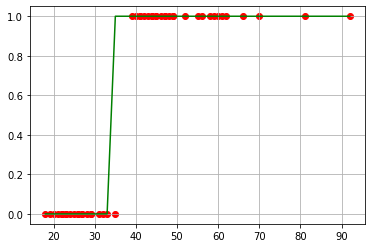

In [94]:
plt.scatter(x, y, color='red')
plt.plot(sorted(x_list), s, color="g")
plt.grid(True)
plt.show

In [95]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
X_test

,Age
28,23
11,39
10,33
41,41
2,22
27,23
38,45
31,22
22,60
4,25


In [96]:
regr = linear_model.LogisticRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)
regr.score(X_test, y_test)

LogisticRegression()

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

1.0

In [97]:
regr.predict([[20]])
regr.predict([[99]])
regr.predict([[12]])
regr.predict([[1]])


array([0], dtype=int64)

array([1], dtype=int64)

array([0], dtype=int64)

array([0], dtype=int64)

In [98]:
regr.predict_proba(X_test)

array([[9.99994965e-01, 5.03461111e-06],
       [1.68223874e-01, 8.31776126e-01],
       [9.72768485e-01, 2.72315147e-02],
       [3.47922984e-02, 9.65207702e-01],
       [9.99997875e-01, 2.12548368e-06],
       [9.99994965e-01, 5.03461111e-06],
       [1.14374092e-03, 9.98856259e-01],
       [9.99997875e-01, 2.12548368e-06],
       [2.76174372e-09, 9.99999997e-01],
       [9.99971753e-01, 2.82471533e-05],
       [9.99111539e-01, 8.88461483e-04],
       [9.88319797e-01, 1.16802028e-02],
       [9.99999103e-01, 8.97323183e-07]])

# Naive Bayes
This algorithm also preforms well with this data set however its a but much for what we need since we dont need more than one feature to get an output and because this data set also only has two columns it cant use this algorithm to its best

In [99]:
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
import seaborn as sns



df = pd.read_csv('./CSV/Insurance.csv')

In [100]:
train, test = train_test_split(df, test_size=0.30)

In [101]:
features = ['Age']
target = 'Has_Insurance'

In [102]:
cv_scores = cross_val_score(gnb(), train[features], train[target], cv=5)
print('Gaussian Naive Bayes', ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

Gaussian Naive Bayes  mean accuracy:  100.0 % std:  0.0 %


In [103]:
final_model_gnb = gnb().fit(train[features], train[target])
y_hat_gnb = final_model_gnb.predict(test[features])

test accuracy for Gaussian naive bayes classifier: 93.33 %
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.89      1.00      0.94         8

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

[[6 1]
 [0 8]]


Text(0.5, 1.0, 'confusion matrix for Gaussian naive bayes classifier')

<AxesSubplot:title={'center':'confusion matrix for Gaussian naive bayes classifier'}>

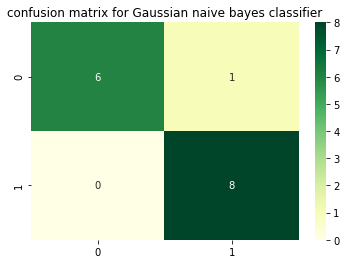

In [104]:
print('test accuracy for Gaussian naive bayes classifier:', round(accuracy_score(test[target], y_hat_gnb)*100, 2),'%')
print(metrics.classification_report(test[target], y_hat_gnb))
print(confusion_matrix(test[target], y_hat_gnb))
plt.title('confusion matrix for Gaussian naive bayes classifier')
sns.heatmap(confusion_matrix(test[target], y_hat_gnb), annot=True, cmap="YlGn")
plt.show()

# Testing naive prediction

In [105]:
insured = {'Age': ['20','99','12','1','25','32','5','102'],
        'Has_Insurance': [0,1,0,0,0,1,0,1]
       }

test = pd.DataFrame(insured, columns = ['Age', 'Has_Insurance'])

In [106]:
cv_scores = cross_val_score(gnb(), train[features], train[target], cv=5)
print('Gaussian Naive Bayes', ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

Gaussian Naive Bayes  mean accuracy:  100.0 % std:  0.0 %


test accuracy for Gaussian naive bayes classifier: 75.0 %
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.67      0.67      0.67         3

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

[[4 1]
 [1 2]]


Text(0.5, 1.0, 'confusion matrix for Gaussian naive bayes classifier')

<AxesSubplot:title={'center':'confusion matrix for Gaussian naive bayes classifier'}>

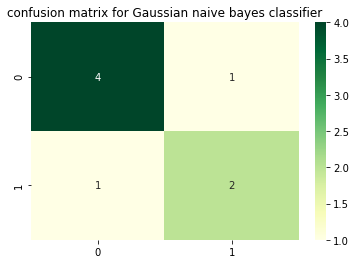

In [107]:
final_model_gnb = gnb().fit(train[features], train[target])
y_hat_gnb = final_model_gnb.predict(test[features])


print('test accuracy for Gaussian naive bayes classifier:', round(accuracy_score(test[target], y_hat_gnb)*100, 2),'%')
print(metrics.classification_report(test[target], y_hat_gnb))
print(confusion_matrix(test[target], y_hat_gnb))

plt.title('confusion matrix for Gaussian naive bayes classifier')
sns.heatmap(confusion_matrix(test[target], y_hat_gnb), annot=True, cmap="YlGn")
plt.show()

In [108]:
pred2 = final_model_gnb.predict_proba(test[features])


print("------Has Insurance--------")
for i in pred2:
    if(i[0] > .5):
        print("They no have insucance: ", i)
    else:
        print("They have insurance: ", i)

------Has Insurance--------
They no have insucance:  [0.99360947 0.00639053]
They have insurance:  [9.12294676e-59 1.00000000e+00]
They no have insucance:  [0.98245498 0.01754502]
They have insurance:  [0.12977607 0.87022393]
They no have insucance:  [0.98631685 0.01368315]
They no have insucance:  [0.79952816 0.20047184]
They no have insucance:  [0.70242369 0.29757631]
They have insurance:  [2.29233818e-63 1.00000000e+00]


# Decision Tree
This algorithm works well since there is one input and one output however this algorithm needs a larger data set and test set file and since this data set isnt complicated with many targets it fits this algorithm well however the logisic regression is still the better due to the simplisity of this set 

In [109]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [110]:
df = pd.read_csv('./CSV/Insurance.csv')

In [111]:
x = df.drop('Has_Insurance', axis=1)
y = df['Has_Insurance']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [113]:
model = tree.DecisionTreeClassifier()

In [114]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [115]:
y_predict = model.predict(X_test)


In [116]:
accuracy_score(y_test, y_predict)


1.0

In [117]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Has Insuance', 'Predicted Has Insurance'],
    index=['True Not Has Insurance', 'True Has Insurance']
)

,Predicted Not Has Insuance,Predicted Has Insurance
True Not Has Insurance,7,0
True Has Insurance,0,6


In [118]:
x = test.drop('Has_Insurance', axis=1)
y = test['Has_Insurance']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Has Insuance', 'Predicted Has Insurance'],
    index=['True Not Has Insurance', 'True Has Insurance']
)

1.0

,Predicted Not Has Insuance,Predicted Has Insurance
True Not Has Insurance,1,0
True Has Insurance,0,1


# Random Forest

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values

In [121]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)


In [123]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

RandomForestClassifier(n_estimators=20, random_state=0)

In [124]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

1.0


# Conclusion
In conclusion while all of the classification algorithms we tried work well for this data set because of the simplicity 
if i had used a more advanced data set we could have shown how naive Bayes can use multiple targets as well as decision tree with random forest and gotten a better prediction but since the predictions are so simple they all work fairly well